# TWO:

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [ ]:
!pip install wordcloud 

In [ ]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests

from tqdm import tqdm_notebook
from bs4 import BeautifulSoup as bs

In [ ]:
#creating an empty review list
iphone_reviews = []

In [ ]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [ ]:
##Writing reviews in a text file
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [ ]:
import os
os.getcwd()

'C:\\Users\\shama\\Documents\\DS assignments\\Text Mining'

In [ ]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(iphone_reviews)

# Data Cleaning

In [ ]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [ ]:
red_rev_string

' as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of this phone oh yes the iphone is light to handle however it is not easy to handle the iphone comes with metal edges and there have been multiple complaints with respect to these edges if you handle this p

# Tokenization

In [ ]:
##Splitting each word with space -- Tokenization
red_rev_words = red_rev_string.split(" ")

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [ ]:
red_rev_words

['',
 'usual',
 'great',
 'premium',
 'phone',
 'prosthis',
 'time',
 'apple',
 'iphone',
 'uses',
 'right',
 'angled',
 'bezel',
 'iphone',
 'looks',
 'square',
 'feels',
 'good',
 'hand',
 'feels',
 'better',
 'sleek',
 'bezel',
 'iphone',
 'x',
 'especially',
 'mm',
 'thickness',
 'right',
 'angles',
 'border',
 'particularly',
 'stylish',
 'camera',
 'awesome',
 'night',
 'view',
 'mode',
 'turns',
 'automatically',
 'imaging',
 'effect',
 'really',
 'good',
 'video',
 'stabilization',
 'also',
 'good',
 'filter',
 'mode',
 'quite',
 'good',
 'many',
 'android',
 'phones',
 'still',
 'many',
 'miles',
 'away',
 'tones',
 'even',
 'though',
 'good',
 'imitations',
 'apple',
 'able',
 'improve',
 'tones',
 'image',
 'quality',
 'perfect',
 'little',
 'noise',
 'even',
 'low',
 'light',
 'environment',
 'signal',
 'nothing',
 'say',
 'much',
 'better',
 'iphone',
 'pro',
 'wifi',
 'also',
 'consthere',
 'problem',
 'hand',
 'handling',
 'phone',
 'oh',
 'yes',
 'iphone',
 'light',
 'h

In [ ]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

# Wordcloud

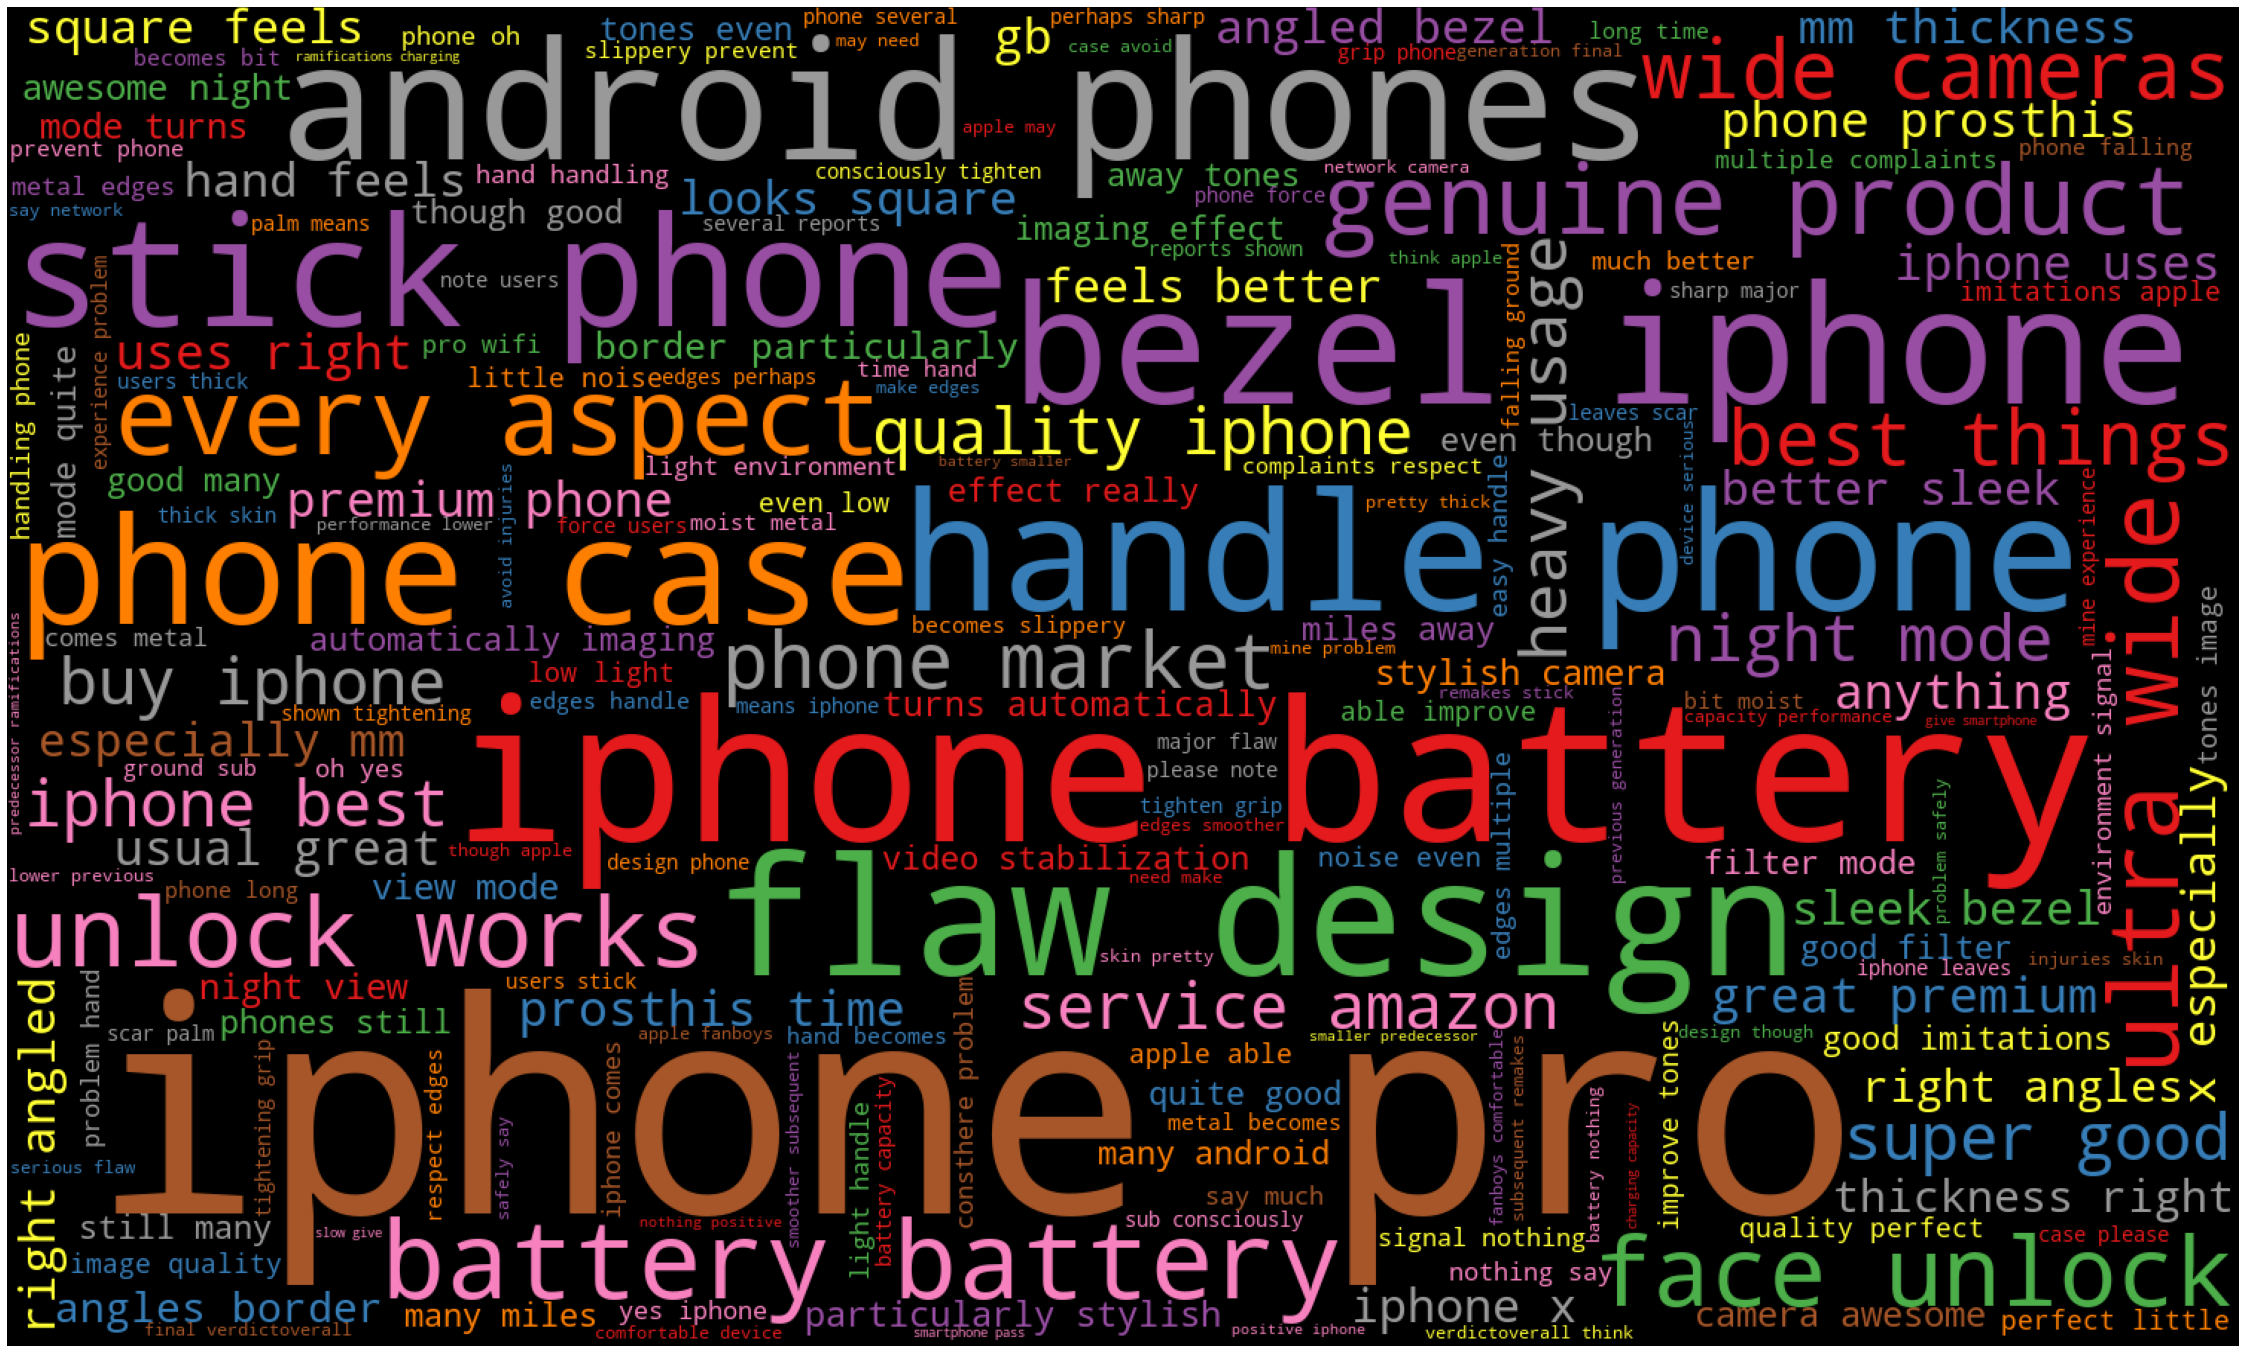

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=1500,height=900,background_color='black',
                   colormap='Set1',stopwords=STOPWORDS).generate(red_rev_string)
plot_cloud(wordcloud)

In [ ]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [ ]:
negwords =negwords[37:]

# Word Cloud for negative word

In [ ]:
reviews_neg = " ".join([w for w in red_rev_words if w in negwords])

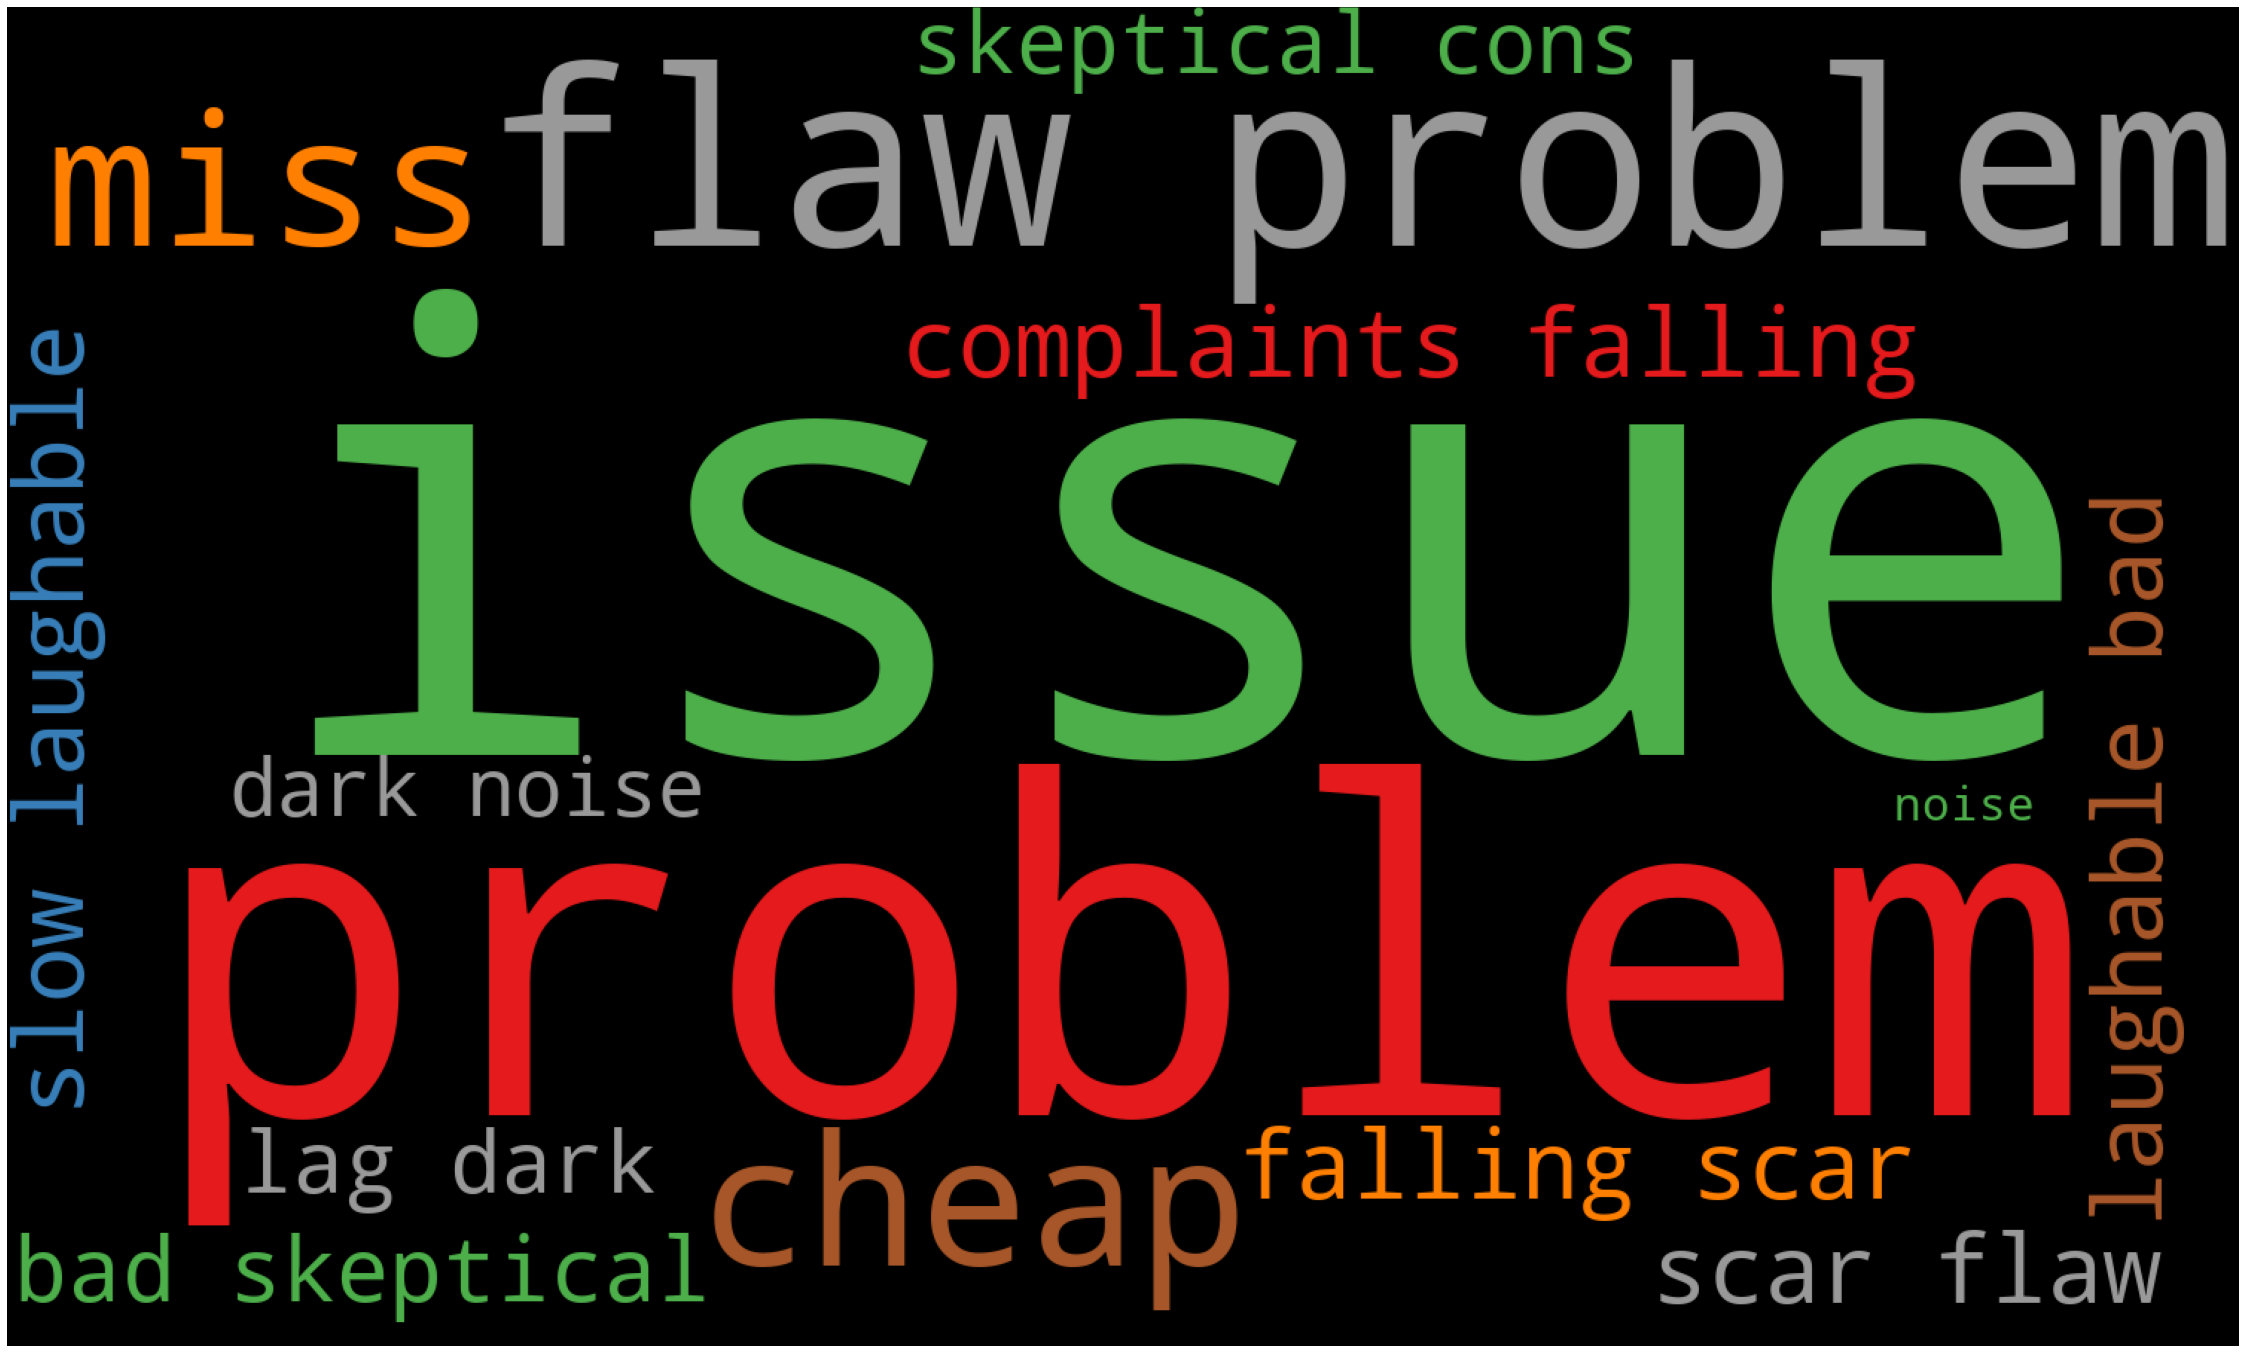

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=1500,height=900,background_color='black',
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [ ]:
# positive words  Choose path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [ ]:
reviews_pos=' '.join([word for word in reviews if word in poswords])
poswords = poswords[35:]

In [ ]:
reviews_pos = " ".join([w for w in red_rev_words if w in poswords])

# Word Cloud for positive word

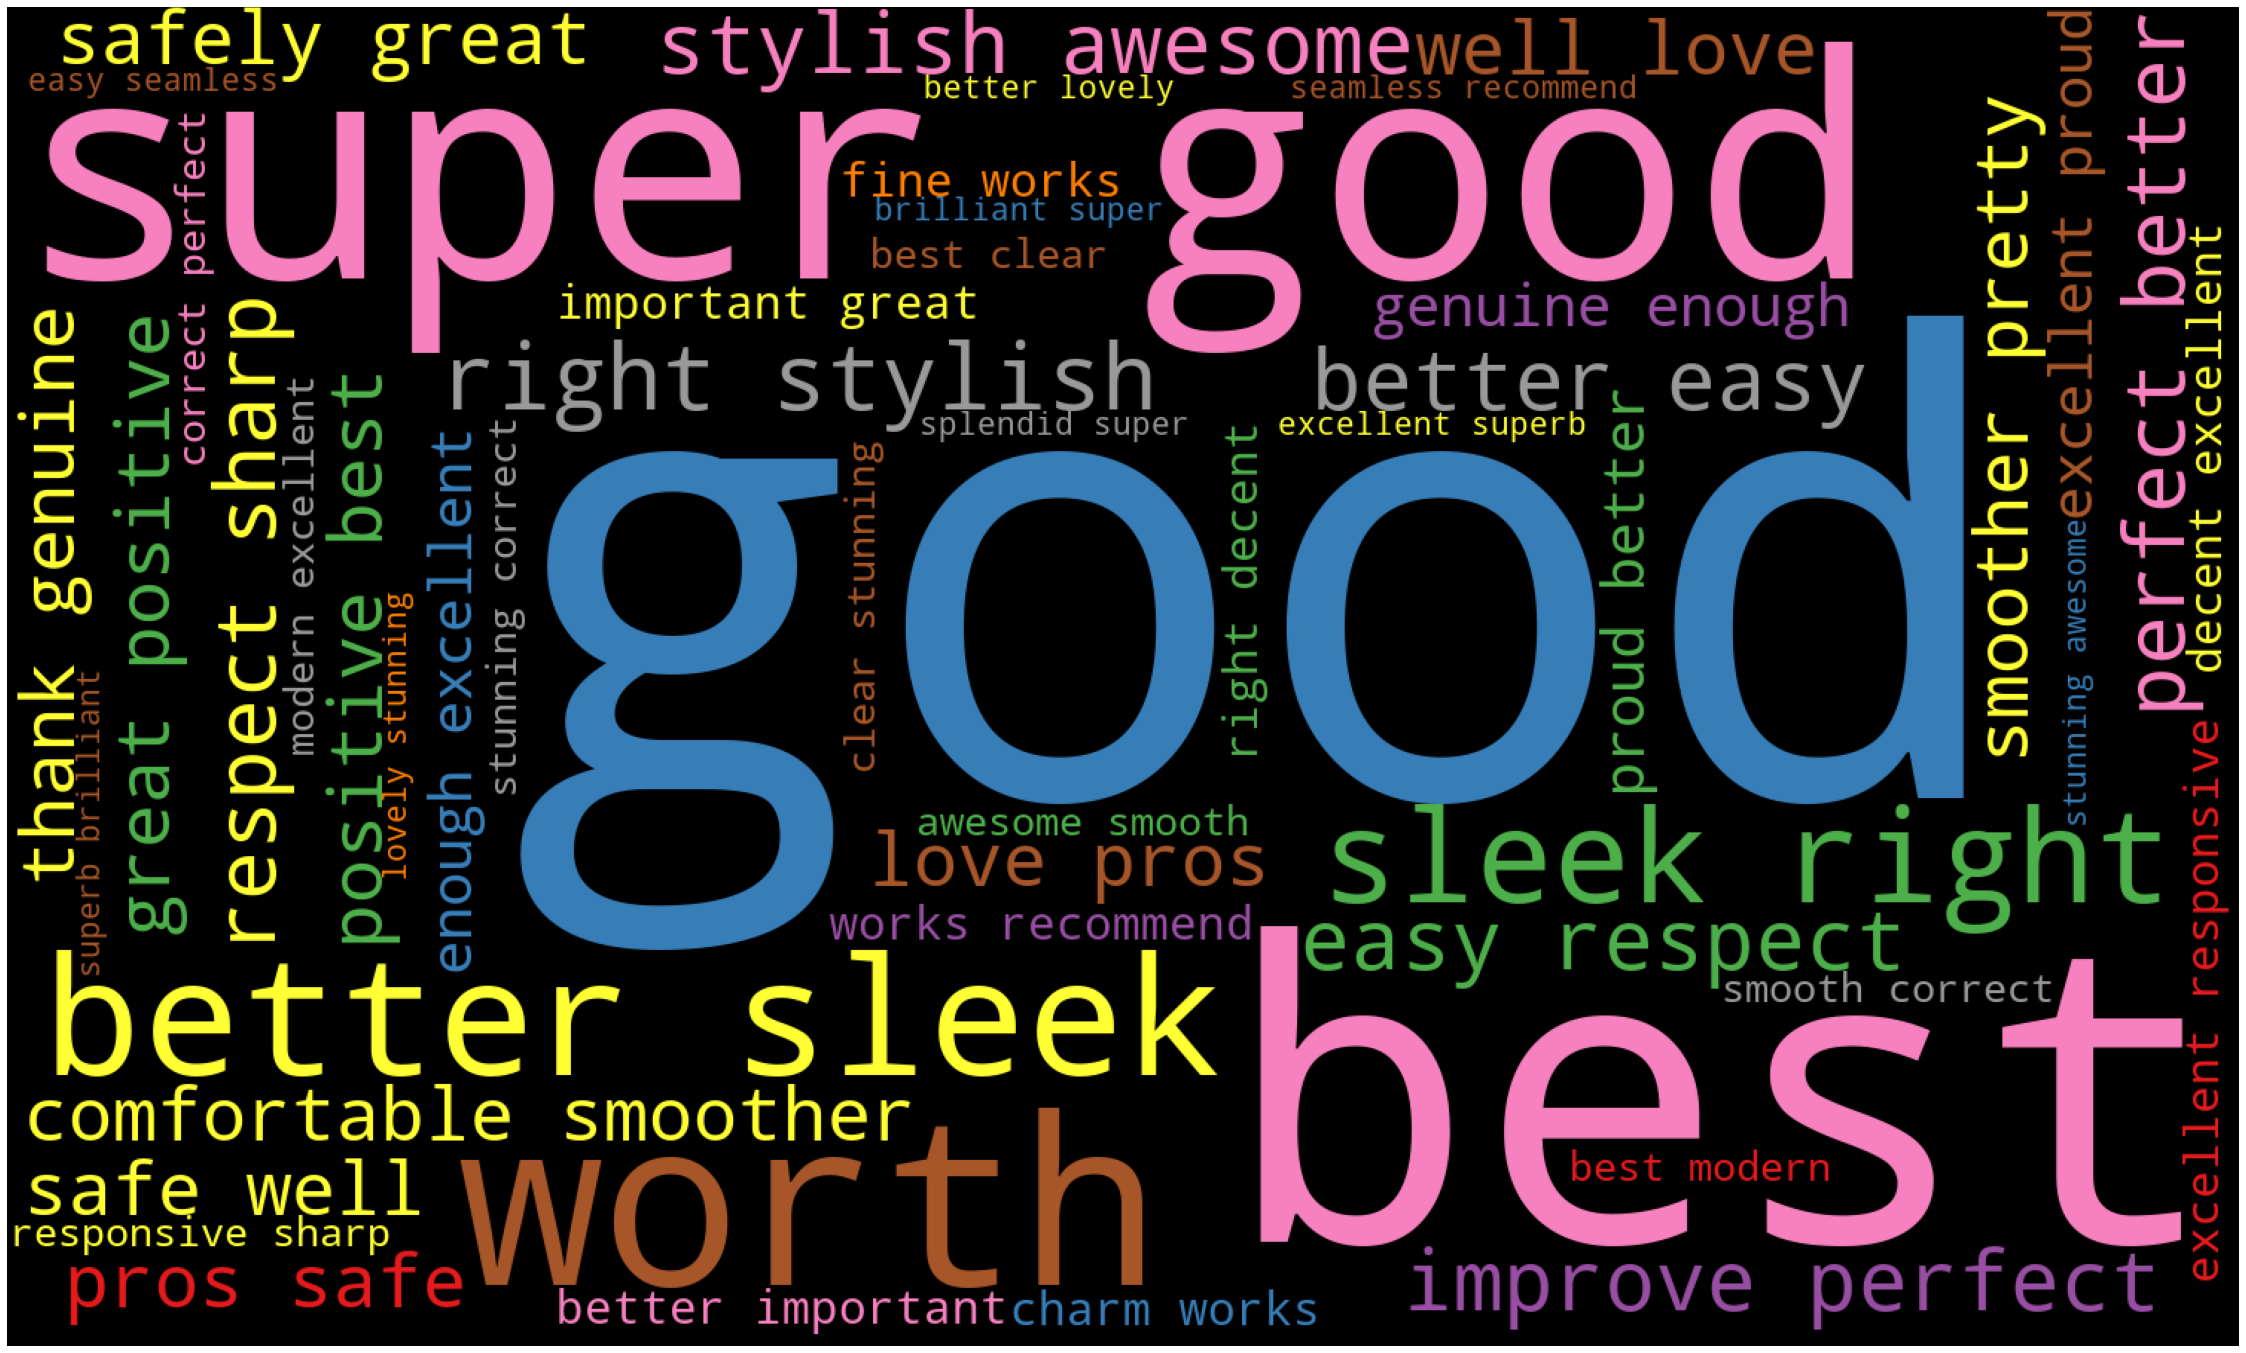

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=1500,height=900,background_color='black',
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)

In [ ]:
##Unique words
red_unique = list(set(" ".join(iphone_reviews).split(" ")))

In [ ]:
red_unique

['',
 'iPhone.',
 'weeks',
 'comes',
 'good!',
 'every',
 'overall',
 'great',
 '\nAs',
 'ground,',
 'looking',
 'here',
 'effect',
 'using',
 'cons',
 'palm.',
 '...',
 'time.So',
 'photos',
 'it!!So',
 'times.',
 'giving',
 'it!\n',
 ',First',
 'iPhones',
 'can',
 'used',
 'it',
 'becomes',
 'users',
 'product',
 'since',
 'online',
 'Also',
 'sleek',
 'recommend',
 'user',
 'battery,',
 'decent',
 'move',
 'phone',
 '(32GB)',
 'day',
 'those',
 'DSLR',
 'good!!!!!!!!The',
 'getting',
 'Several',
 'see',
 'chip',
 'problem.***',
 '6',
 'leaves',
 'brilliant',
 '\nHello',
 '12',
 'clicking',
 'Is',
 'pro',
 'measure',
 'cams.Instead',
 '\nThe',
 'Android',
 'in',
 'turns',
 'serious',
 'I',
 '(Edit:',
 'taking',
 'which',
 'excepted.Face',
 'detailed',
 'r',
 'camera.',
 'modern',
 'new',
 'say!',
 'tones.Image',
 'sure',
 'safe.',
 'even',
 'generation.Final',
 '6s',
 'screen',
 'changed',
 'stunning',
 'video',
 'that',
 'device.',
 'often.',
 '12MP',
 'width',
 'morning',
 'now,',


# Emotion Mining

In [ ]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [ ]:
from nltk import tokenize
import nltk
nltk.download('punkt')
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.',
 'To prevent your phone from falling to the ground, you will sub-consciously tighten your grip on the phone.',
 'Several reports have shown that tightening your grip on the iPhone 12 leaves you with a scar on your palm.']

In [ ]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
579,Especially there is no phone in market clickin...
580,Graphite colour is lovely with glossy sides.
581,Stunning look.Awesome experience using dark mo...
582,makes life so easy and seamless.


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
!pip install spacy -q
!python -m spacy download en_core_web_sm -q

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [ ]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    32
1    18
2     8
3    14
4     5
5     6
6    17
7    23
8     5
9    21
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').head(10)

,word,sentiment_value,word_count
386,"For now, stick with your phone case to avoid i...",-3,10
167,"For now, stick with your phone case to avoid i...",-3,10
94,"For now, stick with your phone case to avoid i...",-3,10
532,"For now, stick with your phone case to avoid i...",-3,10
240,"For now, stick with your phone case to avoid i...",-3,10
21,"For now, stick with your phone case to avoid i...",-3,10
459,"For now, stick with your phone case to avoid i...",-3,10
313,"For now, stick with your phone case to avoid i...",-3,10
520,It is much better in iPhone 12 Pro & Wifi also...,-2,21
475,If you are trying to spend a good amount of mo...,-2,48


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    584.000000
mean       2.178082
std        2.988107
min       -3.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
1,It feels better than the sleek bezel of the iP...,0,18
8,"** Signal, nothing to say!",0,5
9,It is much better in iPhone 12 Pro & Wifi also...,-2,21
11,The iPhone 12 comes with metal edges and there...,0,18
12,"If you handle this phone for a long time, as y...",0,20


In [ ]:
# Sentiment score >10
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
39,"But overall , its good phone and worth the pri...",13,49
61,This iPhone 12pro Is the best in all the thing...,11,41
65,I ordered the phone on 20th June at night (11:...,10,27
70,Stunning look.Awesome experience using dark mo...,11,14
112,"But overall , its good phone and worth the pri...",13,49


In [ ]:
sent_df['index']=range(0,len(sent_df))

C:\Users\shama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

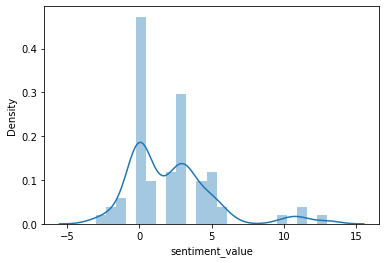

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

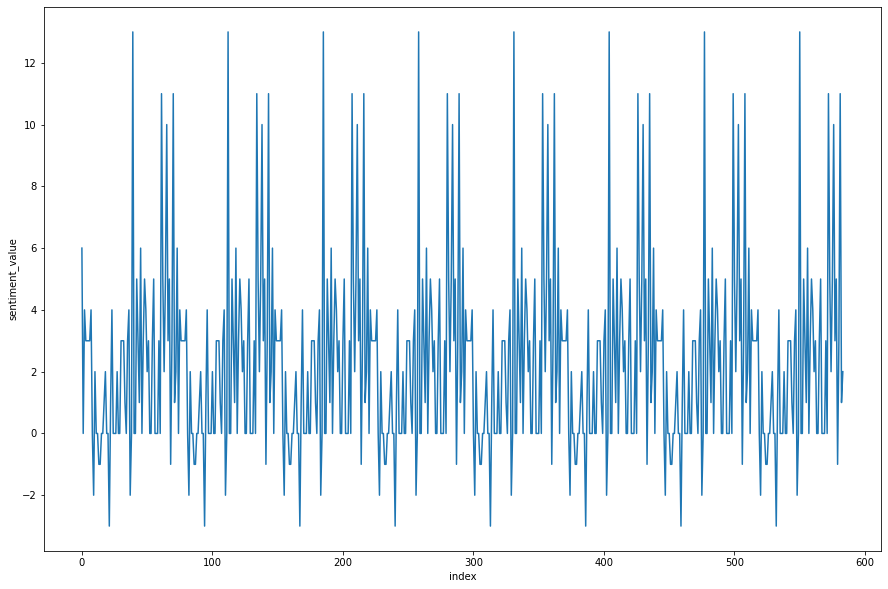

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

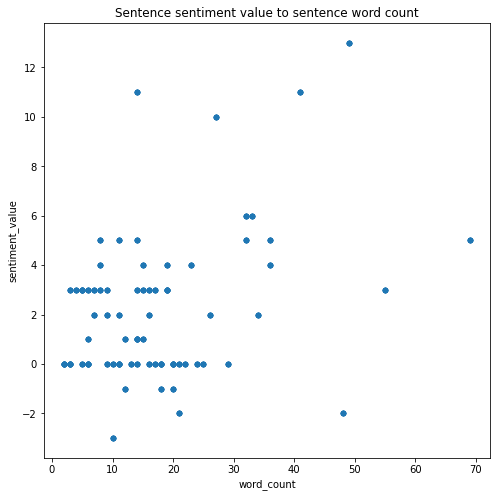

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')